In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb



In [3]:
df = pd.read_csv('AB_NYC_2019.csv')


In [4]:
print(df.head())
print(df.info())
print(df.describe())


     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

In [5]:
print(df.isnull().sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [6]:
df.dropna(subset=['name', 'host_name'], inplace=True)
df['reviews_per_month'].fillna(0, inplace=True)
df['last_review'].fillna('No reviews', inplace=True)

C:\Users\Rami Alrwais\AppData\Local\Temp\ipykernel_30008\3042536644.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews_per_month'].fillna(0, inplace=True)
C:\Users\Rami Alrwais\AppData\Local\Temp\ipykernel_30008\3042536644.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [7]:
print(df.isnull().sum())


id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


In [8]:
print(df[(df['price'] <= 0) | (df['price'] > 2000)])
df = df[(df['price'] > 0) & (df['price'] <= 2000)]
print(df[(df['price'] <= 0) | (df['price'] > 2000)])

             id                                           name    host_id  \
946      363673               Beautiful 3 bedroom in Manhattan     256239   
1862     826690               Sunny, Family-Friendly 2 Bedroom    4289240   
2018     893413     Architecturally Stunning Former Synagogue!    4751930   
2698    1448703            Beautiful 1 Bedroom in Nolita/Soho      213266   
3537    2110145             UWS 1BR w/backyard + block from CP    2151325   
...         ...                                            ...        ...   
45867  34981637    bay ridge & sunset park furnished apartment  263564234   
46533  35297214                      Amazing Chelsea 4BR Loft!  256649546   
46614  35345358                 Northside Williamsburg Stunner     956324   
48043  36056808   Luxury TriBeCa Apartment at an amazing price  271248669   
48304  36189195  Next to Times Square/Javits/MSG! Amazing 1BR!  270214015   

         host_name neighbourhood_group     neighbourhood  latitude  longitu

In [9]:
df = pd.get_dummies(df, columns=['neighbourhood_group', 'room_type'], drop_first=True)
print(df.columns)
print(df.head())

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'neighbourhood_group_Brooklyn',
       'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens',
       'neighbourhood_group_Staten Island', 'room_type_Private room',
       'room_type_Shared room'],
      dtype='object')
     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood  latitude  longitude  price  minimum_nights  \
0         John    Kensington  

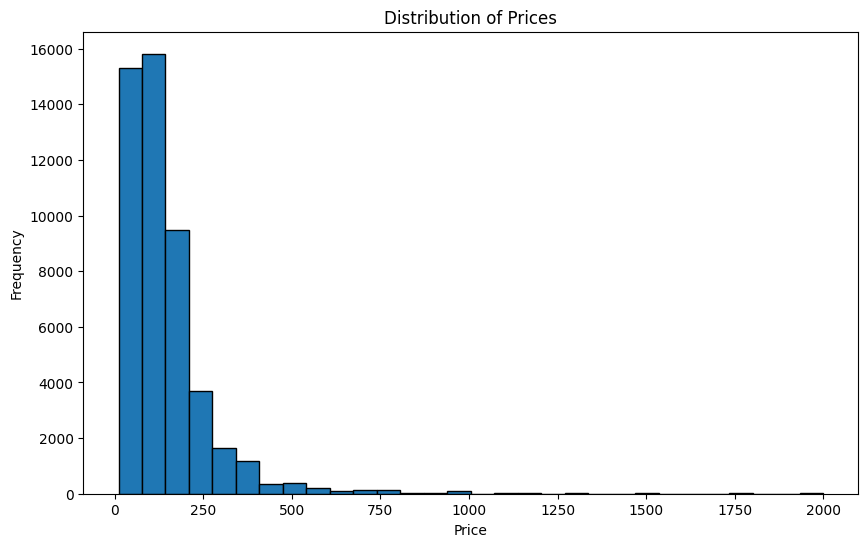

In [147]:
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=30, edgecolor='black')
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [148]:
top_10_neighborhoods = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(10)

print(top_10_neighborhoods)

neighbourhood
Fort Wadsworth       800.000000
Woodrow              700.000000
Sea Gate             487.857143
Prince's Bay         409.500000
Tribeca              386.953757
Flatiron District    341.925000
NoHo                 295.717949
Midtown              278.160078
Neponsit             274.666667
SoHo                 268.402817
Name: price, dtype: float64


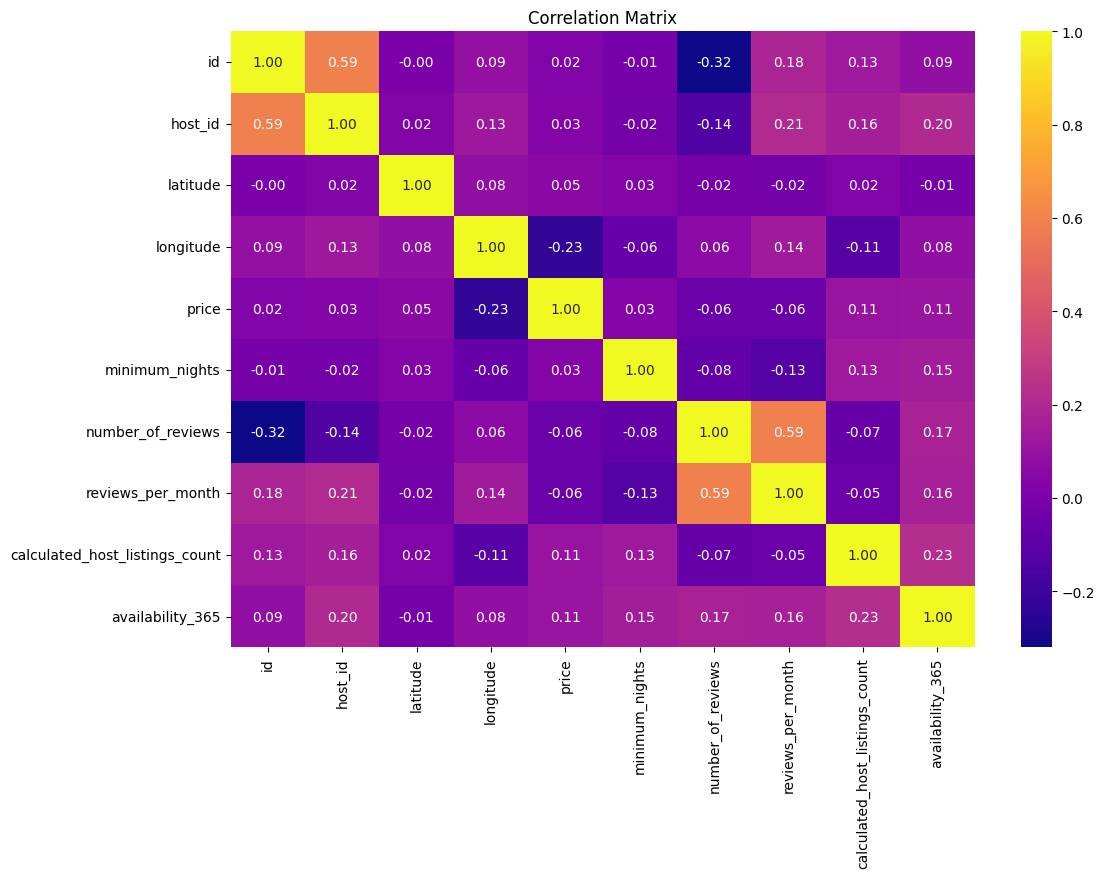

In [149]:
numeric_df = df.select_dtypes(include=[np.number])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='plasma', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

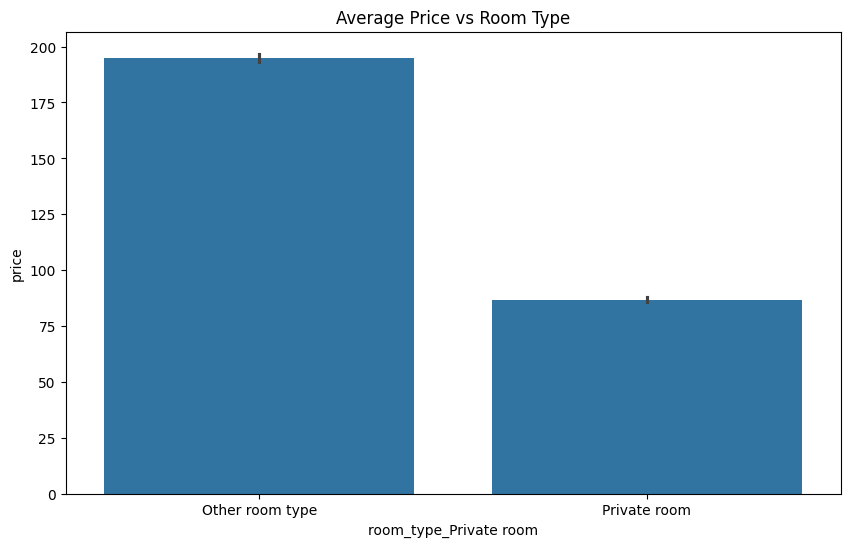

In [150]:
plt.figure(figsize=(10, 6))
sns.barplot(x='room_type_Private room', y='price', data=df)

plt.xticks(ticks=[0, 1], labels=['Other room type', 'Private room'])

plt.title('Average Price vs Room Type')
plt.show()

In [115]:
features = ['neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan', 
            'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island', 
            'room_type_Private room', 'room_type_Shared room', 
            'number_of_reviews', 'availability_365']

X = df[features]
y = df['price']

In [116]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

min_max_scaler = MinMaxScaler()
X_minmax_scaled = min_max_scaler.fit_transform(X)

In [117]:
df_std = pd.DataFrame(X_scaled, columns=features)
df_minmax = pd.DataFrame(X_minmax_scaled, columns=features)

print("StandardScaler Summary Statistics:")
print(df_std.describe())

print("\nMinMaxScaler Summary Statistics:")
print(df_minmax.describe())

StandardScaler Summary Statistics:
       neighbourhood_group_Brooklyn  neighbourhood_group_Manhattan  \
count                  4.876100e+04                   4.876100e+04   
mean                  -2.564663e-17                  -3.497267e-17   
std                    1.000010e+00                   1.000010e+00   
min                   -8.360559e-01                  -8.910314e-01   
25%                   -8.360559e-01                  -8.910314e-01   
50%                   -8.360559e-01                  -8.910314e-01   
75%                    1.196092e+00                   1.122295e+00   
max                    1.196092e+00                   1.122295e+00   

       neighbourhood_group_Queens  neighbourhood_group_Staten Island  \
count                4.876100e+04                       4.876100e+04   
mean                -3.730419e-17                       2.564663e-17   
std                  1.000010e+00                       1.000010e+00   
min                 -3.624165e-01             

In [118]:
print("Comparison of Scaling Methods:")
print("- After applying StandardScaler, all features have mean values close to 0 and standard deviations close to 1, which standardizes features by centering and scaling to unit variance.")
print("- After applying MinMaxScaler, all features are scaled between 0 and 1, preserving the original distribution shape but changing the range.")
print("- For example, the 'number_of_reviews' feature after StandardScaler has mean ~0 and std ~1, while after MinMaxScaler it is bounded between 0 and 1 with a lower standard deviation.")
print("- These differences can affect model training differently, so comparing them helps select the best scaling method for the task.")

Comparison of Scaling Methods:
- After applying StandardScaler, all features have mean values close to 0 and standard deviations close to 1, which standardizes features by centering and scaling to unit variance.
- After applying MinMaxScaler, all features are scaled between 0 and 1, preserving the original distribution shape but changing the range.
- For example, the 'number_of_reviews' feature after StandardScaler has mean ~0 and std ~1, while after MinMaxScaler it is bounded between 0 and 1 with a lower standard deviation.
- These differences can affect model training differently, so comparing them helps select the best scaling method for the task.


In [119]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "SVR": SVR(),
    "XGBoost": xgb.XGBRegressor()
}
results = {}


In [120]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results[model_name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R²': r2}

results_df = pd.DataFrame(results).T
print(results_df)

                         MAE           MSE        RMSE        R²
Linear Regression  61.617193  13334.188165  115.473755  0.237147
Ridge Regression   61.616835  13334.170280  115.473678  0.237149
Lasso Regression   61.314561  13336.307736  115.482933  0.237026
Decision Tree      72.952578  19542.635343  139.794976 -0.118039
Random Forest      65.207221  15083.573687  122.815201  0.137065
SVR                54.679569  13998.267047  118.314272  0.199155
XGBoost            61.333794  13639.673828  116.789014  0.219671


In [122]:
print(
    "Conclusion:\n"
    "1. Best model: SVR, with lowest MAE (~54.68), giving the most accurate predictions.\n"
    "2. Suitability: SVR captures complex patterns better when relationships aren’t strictly linear.\n"
    "3. Improvements: Feature engineering, outlier handling, and hyperparameter tuning for advanced models."
)

Conclusion:
1. Best model: SVR, with lowest MAE (~54.68), giving the most accurate predictions.
2. Suitability: SVR captures complex patterns better when relationships aren’t strictly linear.
3. Improvements: Feature engineering, outlier handling, and hyperparameter tuning for advanced models.
